In [1]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # 允许为DataFrame使用display()

# 导入附加的可视化代码visuals.py
import visuals as vs

# 为notebook提供更加漂亮的可视化
%matplotlib inline

# 导入人口普查数据
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 显示第一条记录
display(train.head(1))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [2]:
len(train)

1460

In [3]:
# 分离特征与输出
value = train['SalePrice']
train = train.drop('SalePrice', axis=1)

In [4]:
# 去除无效标签
test = test.drop('Id',axis=1)
train = train.drop('Id',axis=1)

In [5]:
# 规一化特征
from sklearn.preprocessing import MinMaxScaler

# 填补缺失值
train.GarageYrBlt.fillna(train.GarageYrBlt.mean(),inplace = True)
train.fillna(0,inplace = True)
test.GarageYrBlt.fillna(test.GarageYrBlt.mean(),inplace = True)
test.fillna(0,inplace = True)

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
numerical = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
             'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
             'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt',
            'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
             'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

train[numerical] = scaler.fit_transform(train[numerical])
test[numerical] = scaler.fit_transform(test[numerical])

# 显示一个经过缩放的样例记录
display(train.head(n = 1))

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,RL,65.0,0.03342,Pave,0,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0,0,0,0.0,0.090909,0.5,WD,Normal


In [6]:
# 使用pandas.get_dummies()对'features'数据进行独热编码
features = pd.get_dummies(train)
features_test = pd.get_dummies(test)

# 打印经过独热编码之后的特征数量
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# print encoded

304 total features after one-hot encoding.


In [7]:
# 补全独热缺失项
for cols in features.columns:
    if cols not in features_test.columns:
        features_test[cols] = 0
for cols in features_test.columns:
    if cols not in features.columns:
        features[cols] = 0
features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSZoning_0,Utilities_0,Exterior1st_0,Exterior2nd_0,KitchenQual_0,Functional_0,SaleType_0
0,0.235294,65.0,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0,1,0,0,0,0,0,0,0,0
1,0.000000,80.0,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0,1,0,0,0,0,0,0,0,0
2,0.235294,68.0,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0,1,0,0,0,0,0,0,0,0
3,0.294118,60.0,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.235294,84.0,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0,1,0,0,0,0,0,0,0,0


In [8]:
# 拆分训练/验证集，测试集（需要预测）已经给出

# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 训练集和测试集
X_train, X_test, y_train = features, features_test, value
# 将'X_train'和'y_train'进一步切分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# 显示切分的结果
print "Training set has {} samples.".format(X_train.shape[0])
print "Validation set has {} samples.".format(X_val.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 1168 samples.
Validation set has 292 samples.
Testing set has 1459 samples.


In [9]:
# 训练测试整合函数

# 从sklearn中导入两个评价指标 - fbeta_score和accuracy_score
from sklearn.metrics import r2_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_val, y_val): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_val: features validation set
       - y_val: income validation set
    '''
    
    results = {}
    
    # 使用sample_size大小的训练数据来拟合学习器
    start = time() # 获得程序开始时间
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # 获得程序结束时间
    
    # 计算训练时间
    results['train_time'] = end - start
    
    # 得到在验证集上的预测值
    # 然后得到对前300个训练数据的预测结果
    start = time() # 获得程序开始时间
    predictions_val = learner.predict(X_val)
    predictions_train = learner.predict(X_train[: 300])
    end = time() # 获得程序结束时间
    
    # 计算预测用时
    results['pred_time'] = end - start
            
    # 计算在最前面的300个训练数据的准确率
    results['r2_train'] = r2_score(predictions_train, y_train[: 300])
        
    # 计算在验证上的准确率
    results['r2_val'] = r2_score(predictions_val, y_val)
       
    # 成功
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # 返回结果
    return results

LinearRegression trained on 1168 samples.
LogisticRegression trained on 1168 samples.
ExtraTreeRegressor trained on 1168 samples.
DecisionTreeRegressor trained on 1168 samples.
SVR trained on 1168 samples.
KNeighborsRegressor trained on 1168 samples.
BaggingRegressor trained on 1168 samples.
RandomForestRegressor trained on 1168 samples.
GradientBoostingRegressor trained on 1168 samples.
AdaBoostRegressor trained on 1168 samples.


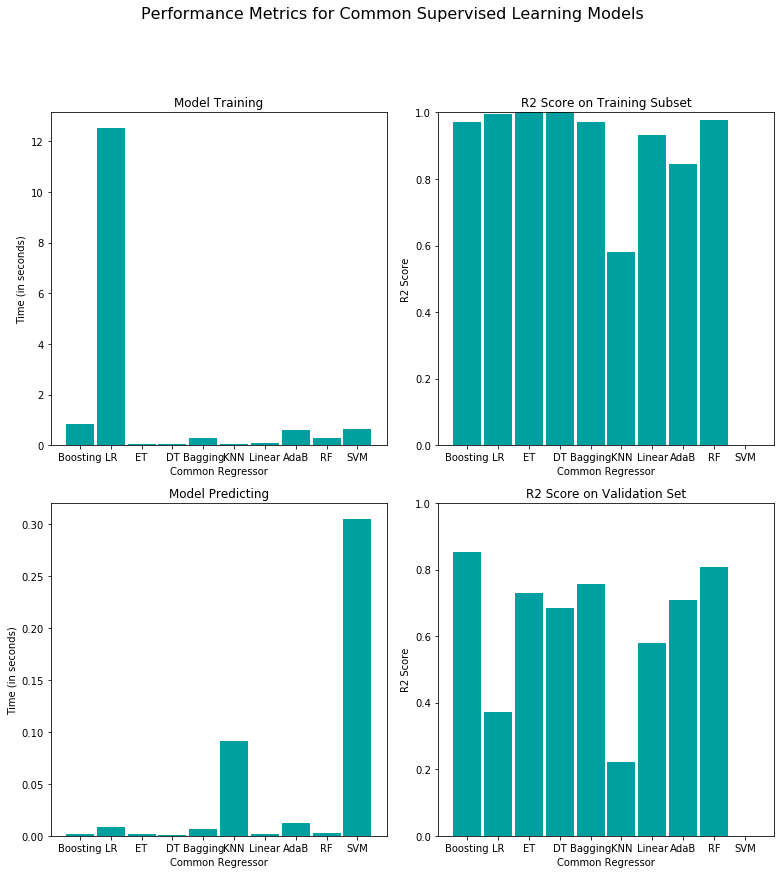

In [10]:
# 初步观察

# 从sklearn中导入监督学习模型
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import ensemble
from sklearn import linear_model
from sklearn import svm
from sklearn import neighbors

# 初始化模型
clf_A = linear_model.LinearRegression()
clf_B = LogisticRegression()
clf_C = tree.ExtraTreeRegressor()
clf_D = tree.DecisionTreeRegressor()
clf_E = svm.SVR()
clf_F = neighbors.KNeighborsRegressor()
clf_G = ensemble.BaggingRegressor()
clf_H = ensemble.RandomForestRegressor()
clf_I = ensemble.GradientBoostingRegressor()
clf_J = ensemble.AdaBoostRegressor()

# 100%的训练数据
samples_100 = len(X_train)

# 收集学习器的结果
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F, clf_G, clf_H, clf_I, clf_J]:
    clf_name = clf.__class__.__name__
    results[clf_name] = train_predict(clf, samples_100, X_train, y_train, X_val, y_val)

# 对选择的三个模型得到的评价结果进行可视化
vs.evaluate(results)

In [11]:
results

{'AdaBoostRegressor': {'pred_time': 0.012000083923339844,
  'r2_train': 0.84490294052614279,
  'r2_val': 0.70794047867579524,
  'train_time': 0.5959999561309814},
 'BaggingRegressor': {'pred_time': 0.006999969482421875,
  'r2_train': 0.97174537090039714,
  'r2_val': 0.75664058698340542,
  'train_time': 0.29799985885620117},
 'DecisionTreeRegressor': {'pred_time': 0.0009999275207519531,
  'r2_train': 1.0,
  'r2_val': 0.68520989783651198,
  'train_time': 0.04800009727478027},
 'ExtraTreeRegressor': {'pred_time': 0.002000093460083008,
  'r2_train': 1.0,
  'r2_val': 0.72846404037176449,
  'train_time': 0.04999995231628418},
 'GradientBoostingRegressor': {'pred_time': 0.002000093460083008,
  'r2_train': 0.97065883729012525,
  'r2_val': 0.85173389739363903,
  'train_time': 0.8510000705718994},
 'KNeighborsRegressor': {'pred_time': 0.09099984169006348,
  'r2_train': 0.58015012959752954,
  'r2_val': 0.22092957840987759,
  'train_time': 0.03500008583068848},
 'LinearRegression': {'pred_time': 0

In [12]:
# 人生苦短，我选GradientBoosting

In [13]:
# 导入'GridSearchCV', 'make_scorer'和其他一些需要的库
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer

# 初始化分类器
clf = ensemble.GradientBoostingRegressor()

# 创建你希望调节的参数列表
parameters = {'n_estimators':[250,400,600], 'min_samples_split':[3,5,7]}

# 创建一个fbeta_score打分对象
scorer = make_scorer(r2_score)

# 在分类器上使用网格搜索，使用'scorer'作为评价函数
grid_obj = GridSearchCV(cv=KFold(),scoring=scorer,param_grid=parameters,estimator=clf)

# 用训练数据拟合网格搜索对象并找到最佳参数
grid_obj.fit(X_train, y_train)

# 得到best_estimator
best_clf = grid_obj.best_estimator_
best_predictions = best_clf.predict(X_val)

print "\nOptimized Model\n------"
print "Final R2-score on the validation data: {:.4f}".format(r2_score(y_val, best_predictions))


Optimized Model
------
Final R2-score on the validation data: 0.8984


In [14]:
for key in ['n_estimators', 'min_samples_split']:
    print "The best " + key + " is {}.".format(best_clf.get_params()[key])

The best n_estimators is 250.
The best min_samples_split is 3.


In [15]:
# 用最佳模型进行预测
final_pred = best_clf.predict(X_test)
pd.Series(final_pred).to_csv('subm.csv')